In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

from sklearn.metrics import *
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

#usiamo SCIPY e i dendogrammi 
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
from scipy.spatial.distance import pdist, squareform

In [4]:
df = pd.read_csv('Train_newColumns.csv')

In [5]:
df1 = df[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df2 = df[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df3 = df[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df4 = df[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df5 = df[['MonthlyIncome', 'Stagnation', 'YearsAtCompany']]

In [50]:
#il MinMaxScaler fa una normalizzazione nel range 0 e 1
#lo standardScaler media 0 dvstd 1
scaler = StandardScaler()
#il metodo fa il fit e poi trasforma
df_zscore = scaler.fit_transform(df5.values) #x = dataset normalizzato

In [51]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 11):
  for l in linkages:
    for metr in metrics:
        #ricorda che ward usa la SSE e non va bene con manhattan
      if l == 'ward' and metr != 'euclidean':
        continue
      res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(df_zscore)
      results.append({
        'res': res,
        'k': k,
        'silu': silhouette_score(df_zscore, res.labels_, metric = metr),
        'link': l,
        'metric': metr
      })
  print("end k = ", k, res)

end k =  2 AgglomerativeClustering(affinity='manhattan', linkage='single')
end k =  3 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=3)
end k =  4 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=4)
end k =  5 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=5)
end k =  6 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=6)
end k =  7 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=7)
end k =  8 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=8)
end k =  9 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=9)
end k =  10 AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=10)


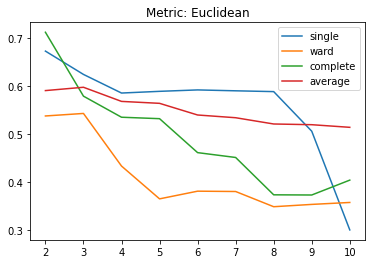

In [52]:
#andiamo a vedere la silhouette per le due distanze, qui euclidea, sotto manhattan
#quando scende la curva ci permette di capire il numero di cluster ideali
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean')

ax.legend()

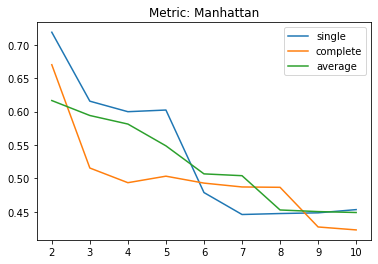

In [53]:
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'manhattan']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'manhattan']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'manhattan']

ys = [y1, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Manhattan')

ax.legend()

In [54]:
#METRICHE EUCLIDEA E MANHATTAN

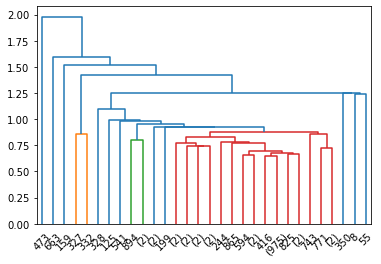

In [55]:
#single è probabilmente il peggiore
data_dist = pdist(df_zscore, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.9, truncate_mode='lastp')

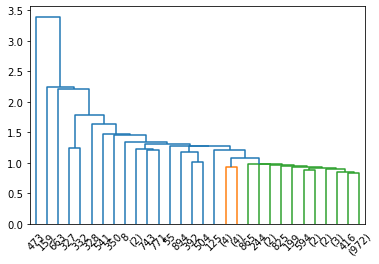

In [56]:
#single è probabilmente il peggiore
data_dist = pdist(df_zscore, metric='cityblock')
data_link = linkage(data_dist, method='single', metric='manhattan')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

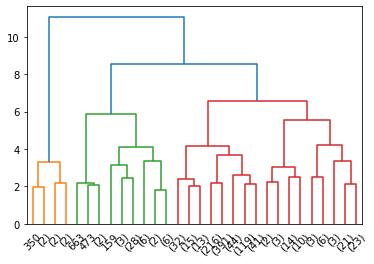

In [57]:
data_dist = pdist(df_zscore, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=8, truncate_mode='lastp')

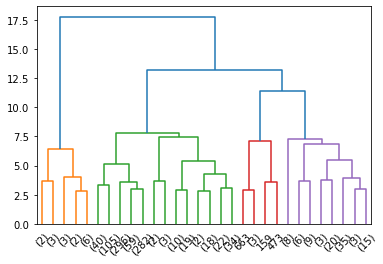

In [58]:
data_dist = pdist(df_zscore, metric='cityblock')
data_link = linkage(data_dist, method='complete', metric='manhattan')
res = dendrogram(data_link, color_threshold=10, truncate_mode='lastp',)

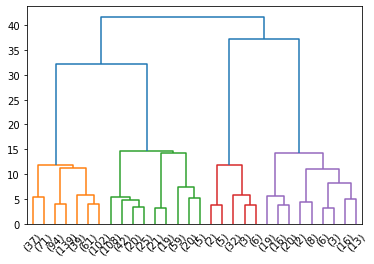

In [129]:
data_dist = pdist(df_zscore, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=18, truncate_mode='lastp')

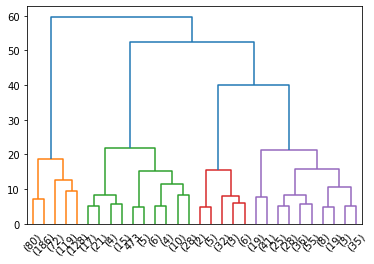

In [130]:
data_dist = pdist(df_zscore, metric='cityblock')
data_link = linkage(data_dist, method='ward', metric='manhattan')
res = dendrogram(data_link, color_threshold=22, truncate_mode='lastp')

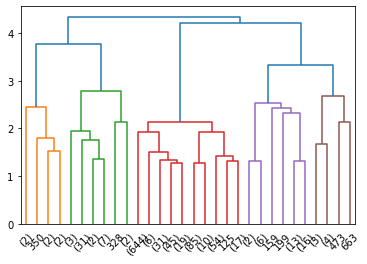

In [131]:
data_dist = pdist(df_zscore, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=3, truncate_mode='lastp')

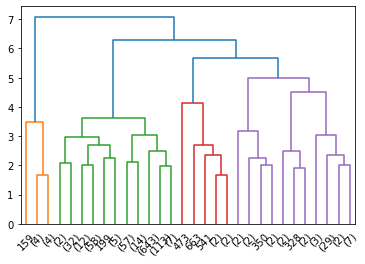

In [142]:
data_dist = pdist(df_zscore, metric='cityblock')
data_link = linkage(data_dist, method='average', metric='manhattan')
res = dendrogram(data_link, color_threshold=5, truncate_mode='lastp')

In [133]:
#calcolo dei cluster e della silhouette per distanza = EUCLIDEA & linkage = COMPLETE
connectivity=None
for i in range(2, 10):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean', connectivity=connectivity)
    complete.fit(df_zscore)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, complete.labels_))

Numero Cluster:  2
Cluster {0: 1006, 1: 7}
Silhouette Score 0.7129534556717402
Numero Cluster:  3
Cluster {0: 956, 1: 7, 2: 50}
Silhouette Score 0.579540375395815
Numero Cluster:  4
Cluster {0: 50, 1: 871, 2: 85, 3: 7}
Silhouette Score 0.5355489216634277
Numero Cluster:  5
Cluster {0: 85, 1: 871, 2: 46, 3: 7, 4: 4}
Silhouette Score 0.5325328564869829
Numero Cluster:  6
Cluster {0: 56, 1: 871, 2: 46, 3: 7, 4: 4, 5: 29}
Silhouette Score 0.46165539096836283
Numero Cluster:  7
Cluster {0: 871, 1: 47, 2: 46, 3: 7, 4: 4, 5: 29, 6: 9}
Silhouette Score 0.4515454482118459
Numero Cluster:  8
Cluster {0: 46, 1: 47, 2: 811, 3: 7, 4: 4, 5: 29, 6: 9, 7: 60}
Silhouette Score 0.37359679599364254
Numero Cluster:  9
Cluster {0: 811, 1: 47, 2: 14, 3: 7, 4: 4, 5: 29, 6: 9, 7: 60, 8: 32}
Silhouette Score 0.3732152602388774


In [134]:
#calcolo dei cluster e della silhouette per distanza = MANHATTAN & linkage = COMPLETE
connectivity=None
for i in range(2, 10):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='manhattan', connectivity=connectivity)
    complete.fit(df_zscore)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, complete.labels_))

Numero Cluster:  2
Cluster {0: 997, 1: 16}
Silhouette Score 0.6669494330531981
Numero Cluster:  3
Cluster {0: 105, 1: 16, 2: 892}
Silhouette Score 0.5093624207138926
Numero Cluster:  4
Cluster {0: 892, 1: 6, 2: 99, 3: 16}
Silhouette Score 0.4916333431922859
Numero Cluster:  5
Cluster {0: 110, 1: 6, 2: 99, 3: 16, 4: 782}
Silhouette Score 0.4822822819000367
Numero Cluster:  6
Cluster {0: 99, 1: 6, 2: 105, 3: 16, 4: 782, 5: 5}
Silhouette Score 0.4697291124048066
Numero Cluster:  7
Cluster {0: 6, 1: 91, 2: 105, 3: 16, 4: 782, 5: 5, 6: 8}
Silhouette Score 0.466345538428809
Numero Cluster:  8
Cluster {0: 91, 1: 16, 2: 105, 3: 2, 4: 782, 5: 5, 6: 8, 7: 4}
Silhouette Score 0.4649981558623922
Numero Cluster:  9
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 8, 7: 4, 8: 2}
Silhouette Score 0.43942579265174314


In [135]:
#calcolo dei cluster e della silhouette per distanza = EUCLIDEA & linkage = AVERAGE
connectivity=None
for i in range(2, 10):
    average = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean', connectivity=connectivity)
    average.fit(df_zscore)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(average.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, average.labels_))

Numero Cluster:  2
Cluster {0: 16, 1: 181}
Silhouette Score 0.5911661270486633
Numero Cluster:  3
Cluster {0: 16, 1: 76, 2: 120}
Silhouette Score 0.5980990648297415
Numero Cluster:  4
Cluster {0: 16, 1: 76, 2: 105, 3: 797}
Silhouette Score 0.5685960632907817
Numero Cluster:  5
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 787}
Silhouette Score 0.5645618255249378
Numero Cluster:  6
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 13}
Silhouette Score 0.5402188340812232
Numero Cluster:  7
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 12}
Silhouette Score 0.5345123221490834
Numero Cluster:  8
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 8, 7: 6}
Silhouette Score 0.5214418889179722
Numero Cluster:  9
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 8, 7: 4, 8: 2}
Silhouette Score 0.5199586411959621


In [136]:
#calcolo dei cluster e della silhouette per distanza = MANHATTAN & linkage = AVERAGE
connectivity=None
for i in range(2, 10):
    average = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='manhattan', connectivity=connectivity)
    average.fit(df_zscore)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(average.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, average.labels_))

Numero Cluster:  2
Cluster {0: 16, 1: 181}
Silhouette Score 0.6480731772049758
Numero Cluster:  3
Cluster {0: 16, 1: 76, 2: 120}
Silhouette Score 0.5902882381097904
Numero Cluster:  4
Cluster {0: 16, 1: 76, 2: 105, 3: 797}
Silhouette Score 0.5814942203114608
Numero Cluster:  5
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 787}
Silhouette Score 0.5462066368305848
Numero Cluster:  6
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 13}
Silhouette Score 0.5080843592574599
Numero Cluster:  7
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 12}
Silhouette Score 0.503677957839203
Numero Cluster:  8
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 8, 7: 6}
Silhouette Score 0.44101473893466325
Numero Cluster:  9
Cluster {0: 16, 1: 76, 2: 105, 3: 15, 4: 782, 5: 5, 6: 8, 7: 4, 8: 2}
Silhouette Score 0.43640790668170376


In [137]:
#calcolo dei cluster e della silhouette per distanza = EUCLIDEA & linkage = WARD
connectivity=None

for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean', connectivity=connectivity)
    ward.fit(df_zscore)
    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, ward.labels_))

Numero Cluster:  2
Cluster {0: 151, 1: 862}
Silhouette Score 0.5381858932599503
Numero Cluster:  3
Cluster {0: 862, 1: 103, 2: 48}
Silhouette Score 0.5434515745914357
Numero Cluster:  4
Cluster {0: 319, 1: 103, 2: 48, 3: 543}
Silhouette Score 0.4336549144107708
Numero Cluster:  5
Cluster {0: 124, 1: 103, 2: 48, 3: 543, 4: 195}
Silhouette Score 0.3651482595620076
Numero Cluster:  6
Cluster {0: 103, 1: 543, 2: 48, 3: 84, 4: 195, 5: 40}
Silhouette Score 0.3812028998354955
Numero Cluster:  7
Cluster {0: 543, 1: 48, 2: 48, 3: 84, 4: 195, 5: 40, 6: 55}
Silhouette Score 0.3805102024299897
Numero Cluster:  8
Cluster {0: 48, 1: 48, 2: 435, 3: 84, 4: 195, 5: 40, 6: 55, 7: 108}
Silhouette Score 0.3487546783350548
Numero Cluster:  9
Cluster {0: 435, 1: 48, 2: 41, 3: 84, 4: 195, 5: 40, 6: 55, 7: 108, 8: 7}
Silhouette Score 0.35358391734492206


#calcolo dei cluster e della silhouette per distanza = MANHATTAN & linkage = WARD --> ward NON FUNZIONA CON MANHATTAN!!!!
connectivity=None

for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='manhattan', connectivity=connectivity)
    ward.fit(df_zscore)
    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, ward.labels_))

in base al plot della silhouette di manhattan i diversi metodi paiono scendere similarmente e quasi convergere.
il metodo single è sicuramente il peggiore.  

prendendo in considerazione un numero di cluster di 3 e 4, i risultati più "incoraggianti" sembrano esserci con:

distanza Manhattan e metodo complete 

Numero Cluster:  3
Cluster {0: 105, 1: 16, 2: 892}
Silhouette Score 0.5093624207138926
Numero Cluster:  4
Cluster {0: 892, 1: 6, 2: 99, 3: 16}
Silhouette Score 0.4916333431922859

distanza Manhattan e metodo average

Numero Cluster:  3
Cluster {0: 16, 1: 76, 2: 120}
Silhouette Score 0.5902882381097904
Numero Cluster:  4
Cluster {0: 16, 1: 76, 2: 105, 3: 797}
Silhouette Score 0.5814942203114608


aggiungendo più cluster la silhouette diminuisce e i grafici iniziano a perdere senso.

euclidea con complete:

Numero Cluster:  3
Cluster {0: 956, 1: 7, 2: 50}
Silhouette Score 0.579540375395815
Numero Cluster:  4
Cluster {0: 50, 1: 871, 2: 85, 3: 7}
Silhouette Score 0.5355489216634277

In [30]:
#calcolo dei cluster e della silhouette per distanza = EUCLIDEA & linkage = AVERAGE
connectivity=None
for i in range(2, 10):
    single = AgglomerativeClustering(n_clusters=i, linkage='single', affinity='euclidean', connectivity=connectivity)
    single.fit(df_zscore)
    hist, bins = np.histogram(single.labels_, bins=range(0, len(set(single.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, single.labels_))

Numero Cluster:  2
Cluster {0: 1012, 1: 1}
Silhouette Score 0.6735762094152382
Numero Cluster:  3
Cluster {0: 1011, 1: 1, 2: 1}
Silhouette Score 0.624905380802413
Numero Cluster:  4
Cluster {0: 1010, 1: 1, 2: 1, 3: 1}
Silhouette Score 0.5860462738599561
Numero Cluster:  5
Cluster {0: 1008, 1: 2, 2: 1, 3: 1, 4: 1}
Silhouette Score 0.589605735635184
Numero Cluster:  6
Cluster {0: 3, 1: 2, 2: 1005, 3: 1, 4: 1, 5: 1}
Silhouette Score 0.59256474641129
Numero Cluster:  7
Cluster {0: 2, 1: 2, 2: 1005, 3: 1, 4: 1, 5: 1, 6: 1}
Silhouette Score 0.5907145197540876
Numero Cluster:  8
Cluster {0: 1005, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
Silhouette Score 0.5890258826856474
Numero Cluster:  9
Cluster {0: 1004, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}
Silhouette Score 0.5063838100671307


In [34]:
#calcolo dei cluster e della silhouette per distanza
connectivity=None
for i in range(2, 10):
    single = AgglomerativeClustering(n_clusters=i, linkage='single', affinity='manhattan', connectivity=connectivity)
    single.fit(df_zscore)
    hist, bins = np.histogram(single.labels_, bins=range(0, len(set(single.labels_)) + 1))
    
    print ('Numero Cluster: ', i)
    print ('Cluster', dict(zip(bins, hist)))
    print ('Silhouette Score', silhouette_score(df_zscore, single.labels_))

Numero Cluster:  2
Cluster {0: 1012, 1: 1}
Silhouette Score 0.6735762094152382
Numero Cluster:  3
Cluster {0: 1011, 1: 1, 2: 1}
Silhouette Score 0.6042059295863688
Numero Cluster:  4
Cluster {0: 1010, 1: 1, 2: 1, 3: 1}
Silhouette Score 0.5860462738599561
Numero Cluster:  5
Cluster {0: 1008, 1: 2, 2: 1, 3: 1, 4: 1}
Silhouette Score 0.589605735635184
Numero Cluster:  6
Cluster {0: 1007, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}
Silhouette Score 0.5059264952071628
Numero Cluster:  7
Cluster {0: 1006, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
Silhouette Score 0.4484532980979653
Numero Cluster:  8
Cluster {0: 1005, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
Silhouette Score 0.4496118464113334
Numero Cluster:  9
Cluster {0: 1004, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}
Silhouette Score 0.45038079737644304
